## Data Extraction Automation using API:

### Importing libraries:

In [3]:
from requests import request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import csv
import os
from time import time
from time import sleep
import seaborn as sns
import matplotlib.pyplot as plt


### Data Extraction:

In [19]:
# create api_runner function
def api_runner():
    global df

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'100',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY':'ad24ace8-5865-4e4f-83e7-46d6fde3a7ff',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    
    
    # normalize the data and make it pretty in a dataframe:
      df2 = pd.json_normalize(data['data'])
      df2['timestamp'] = pd.to_datetime('now')
    
      #df_append = pd.DataFrame(df2)
     # df = pd.concat([df,df_append])
      df = pd.concat([df2, df], ignore_index=True)
      
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    


In [18]:
# make the program sleep for 1 minute and then run again automatically
# Initialize global df
df = pd.DataFrame()

for i in range(333):
    api_runner()
    print('API Runner completed!')
    sleep(60) 
exit()
    

API Runner completed!


KeyboardInterrupt: 

In [20]:
# to change the default display format for floating-point numbers in the  DataFrame:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [22]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12224,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19882440.00000,19882440.00000,False,NaN,1,NaN,NaN,NaN,2025-06-23T05:39:00.000Z,101541.79645,62475354321.26314,37.41100,0.30998,-1.11116,-4.76073,-6.26445,9.50797,17.19160,2018898675357.76733,64.90960,2132377725395.53003,NaN,2025-06-23T05:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-23 00:40:42.905423
1,1027,Ethereum,ETH,ethereum,10354,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120719795.19420,120719795.19420,True,NaN,2,NaN,NaN,NaN,2025-06-23T05:39:00.000Z,2241.39957,25029277003.56312,18.52700,0.27588,-1.76210,-14.23096,-12.05943,26.44270,9.44706,270581297575.39508,8.69950,270581297575.39999,NaN,2025-06-23T05:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-23 00:40:42.905423
2,825,Tether USDt,USDT,tether,133423,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,155965542177.11621,159826220711.40323,True,NaN,3,NaN,NaN,NaN,2025-06-23T05:38:00.000Z,1.00028,93050411405.02954,30.68540,-0.01165,-0.00184,0.01574,0.02255,0.02047,-0.01307,156009739762.68448,5.01590,159871512337.79001,NaN,2025-06-23T05:38:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-06-23 00:40:42.905423
3,52,XRP,XRP,xrp,1629,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,58938652386.00000,99986013292.00000,False,NaN,4,NaN,NaN,NaN,2025-06-23T05:39:00.000Z,2.02159,4958789731.69931,65.05960,-0.01339,-2.54379,-7.48807,-13.60581,-7.53164,-16.79350,119149655988.96075,3.83080,202158772156.22000,NaN,2025-06-23T05:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-23 00:40:42.905423
4,1839,BNB,BNB,bnb,2589,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,140885889.11000,140885889.11000,False,NaN,5,NaN,NaN,NaN,2025-06-23T05:39:00.000Z,622.20980,1852117210.25011,14.93240,0.19591,-1.55512,-4.96676,-6.82445,3.08773,-2.91701,87660580491.98561,2.81840,87660580491.99001,NaN,2025-06-23T05:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-23 00:40:42.905423
5,5426,Solana,SOL,solana,936,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,531085670.94628,603579066.96799,True,NaN,6,525236893.30000,70175619880.77995,NaN,2025-06-23T05:39:00.000Z,133.60756,4611413017.46328,16.57930,0.25390,-1.63077,-15.09550,-23.81777,-9.92110,-4.37135,70957060792.69698,2.28130,80642726571.28000,NaN,2025-06-23T05:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-06-23 00:40:42.905423
6,3408,USDC,USDC,usd-coin,28818,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,61256860830.77764,61256860830.77764,False,NaN,7,60901219650.23000,60894259939.02840,NaN,2025-06-23T05:39:00.000Z,0.99989,12036443401.82237,29.47080,-0.00074,-0.00455,0.00159,-0.00094,-0.00359,-0.03185,61249860477.37016,1.96930,61249860477.37000,NaN,2025-06-23T05:39:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-06-23 00:40:42.905423
7,1958,TRON,TRX,tron,1187,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,94817737620.80754,94817740247.75803,True,NaN,8,71659659264.00000,19139989071.35489,NaN,2025-06-23T05:39:00.000Z,0.26710,1025986147.34873,78.29470,0.31824,-2.00239,-1.36126,-2.09320,9.60863,17.93437,25325412937

In [ ]:
### ### Visualizing the average of change for each cryptocurrency:

In [68]:

# group the data by name of cryptocurrency

df_grouped = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df_grouped

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.30998,-1.11116,-4.76073,-6.26445,9.50797,17.19160
Ethereum,0.27588,-1.76210,-14.23096,-12.05943,26.44270,9.44706
Tether USDt,-0.01165,-0.00184,0.01574,0.02255,0.02047,-0.01307
XRP,-0.01339,-2.54379,-7.48807,-13.60581,-7.53164,-16.79350
BNB,0.19591,-1.55512,-4.96676,-6.82445,3.08773,-2.91701
Solana,0.25390,-1.63077,-15.09550,-23.81777,-9.92110,-4.37135
USDC,-0.00074,-0.00455,0.00159,-0.00094,-0.00359,-0.03185
TRON,0.31824,-2.00239,-1.36126,-2.09320,9.60863,17.93437
Dogecoin,0.32319,-1.79638,-13.82823,-32.93983,-11.85512,-16.65362


In [77]:
# aggregation of the DF group by object:
df_aggregated = df_grouped.stack()
df_aggregated

name                                                               
Bitcoin                                quote.USD.percent_change_1h      0.30998
                                       quote.USD.percent_change_24h    -1.11116
                                       quote.USD.percent_change_7d     -4.76073
                                       quote.USD.percent_change_30d    -6.26445
                                       quote.USD.percent_change_60d     9.50797
                                       quote.USD.percent_change_90d    17.19160
Ethereum                               quote.USD.percent_change_1h      0.27588
                                       quote.USD.percent_change_24h    -1.76210
                                       quote.USD.percent_change_7d    -14.23096
                                       quote.USD.percent_change_30d   -12.05943
                                       quote.USD.percent_change_60d    26.44270
                                       quote.USD.per

In [78]:
df3 = df_aggregated.to_frame(name='values')
df3

values
name                                                                        
Bitcoin                               quote.USD.percent_change_1h    0.30998
                                      quote.USD.percent_change_24h  -1.11116
                                      quote.USD.percent_change_7d   -4.76073
                                      quote.USD.percent_change_30d  -6.26445
                                      quote.USD.percent_change_60d   9.50797
                                      quote.USD.percent_change_90d  17.19160
Ethereum                              quote.USD.percent_change_1h    0.27588
                                      quote.USD.percent_change_24h  -1.76210
                                      quote.USD.percent_change_7d  -14.23096
                                      quote.USD.percent_change_30d -12.05943
                                      quote.USD.percent_change_60d  26.44270
                                      quote.USD.percent_change_90d   9.44706
Tether USDt                           quote.USD.percent_change_1h   -0.01165
                                      quote.USD.percent_change_24h  -0.00184
                                      quote.USD.percent_change_7d    0.01574
                                      quote.USD.percent_change_30d   0.02255
                                      quote.USD.percent_change_60d   0.02047
                                      quote.USD.percent_change_90d  -0.01307
XRP                                   quote.USD.percent_change_1h   -0.01339
                                      quote.USD.percent_change_24h  -2.54379
                                      quote.USD.percent_change_7d   -7.48807
                                      quote.USD.percent_change_30d -13.60581
                                      quote.USD.percent_change_60d  -7.53164
                                      quote.USD.percent_change_90d -16.79350
BNB                                   quote.USD.percent_change_1h    0.19591
                                      quote.USD.percent_change_24h  -1.55512
                                      quote.USD.percent_change_7d   -4.96676
                                      quote.USD.percent_change_30d  -6.82445
                                      quote.USD.percent_change_60d   3.08773
                                      quote.USD.percent_change_90d  -2.91701
Solana                                quote.USD.percent_change_1h    0.25390
                                      quote.USD.percent_change_24h  -1.63077
                                      quote.USD.percent_change_7d  -15.09550
                                      quote.USD.percent_change_30d -23.81777
                                      quote.USD.percent_change_60d  -9.92110
                                      quote.USD.percent_change_90d  -4.37135
USDC                                  quote.USD.percent_change_1h   -0.00074
                                      quote.USD.percent_change_24h  -0.00455
                                      quote.USD.percent_change_7d    0.00159
                                      quote.USD.percent_change_30d  -0.00094
                                      quote.USD.percent_change_60d  -0.00359
                                      quote.USD.percent_change_90d  -0.03185
TRON                                  quote.USD.percent_change_1h    0.31824
                                      quote.USD.percent_change_24h  -2.00239
                                      quote.USD.percent_change_7d   -1.36126
                                      quote.USD.percent_change_30d  -2.09320
                                      quote.USD.percent_change_60d   9.60863
                                      quote.USD.percent_change_90d  17.93437
Dogecoin                              quote.USD.percent_change_1h    0.32319
                                      quote.USD.percent_change_24h  -1.79638
                                      quote.USD.percent_change_7d 

In [79]:
df3 = df3.reset_index()
df3.head()

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.30998
1,Bitcoin,quote.USD.percent_change_24h,-1.11116
2,Bitcoin,quote.USD.percent_change_7d,-4.76073
3,Bitcoin,quote.USD.percent_change_30d,-6.26445
4,Bitcoin,quote.USD.percent_change_60d,9.50797


In [80]:
type(df3)

pandas.core.frame.DataFrame

In [81]:
# rename the column level_1:
df3 = df3.rename(columns={'level_1':'percentage_change'})
df3.head()

,name,percentage_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.30998
1,Bitcoin,quote.USD.percent_change_24h,-1.11116
2,Bitcoin,quote.USD.percent_change_7d,-4.76073
3,Bitcoin,quote.USD.percent_change_30d,-6.26445
4,Bitcoin,quote.USD.percent_change_60d,9.50797


In [82]:
df3['percentage_change']=df3['percentage_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])

In [86]:
df3

,name,percentage_change,values
0,Bitcoin,1h,0.30998
1,Bitcoin,24h,-1.11116
2,Bitcoin,7d,-4.76073
3,Bitcoin,30d,-6.26445
4,Bitcoin,60d,9.50797
5,Bitcoin,90d,17.19160
6,Ethereum,1h,0.27588
7,Ethereum,24h,-1.76210
8,Ethereum,7d,-14.23096
9,Ethereum,30d,-12.05943


C:\Users\sanas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


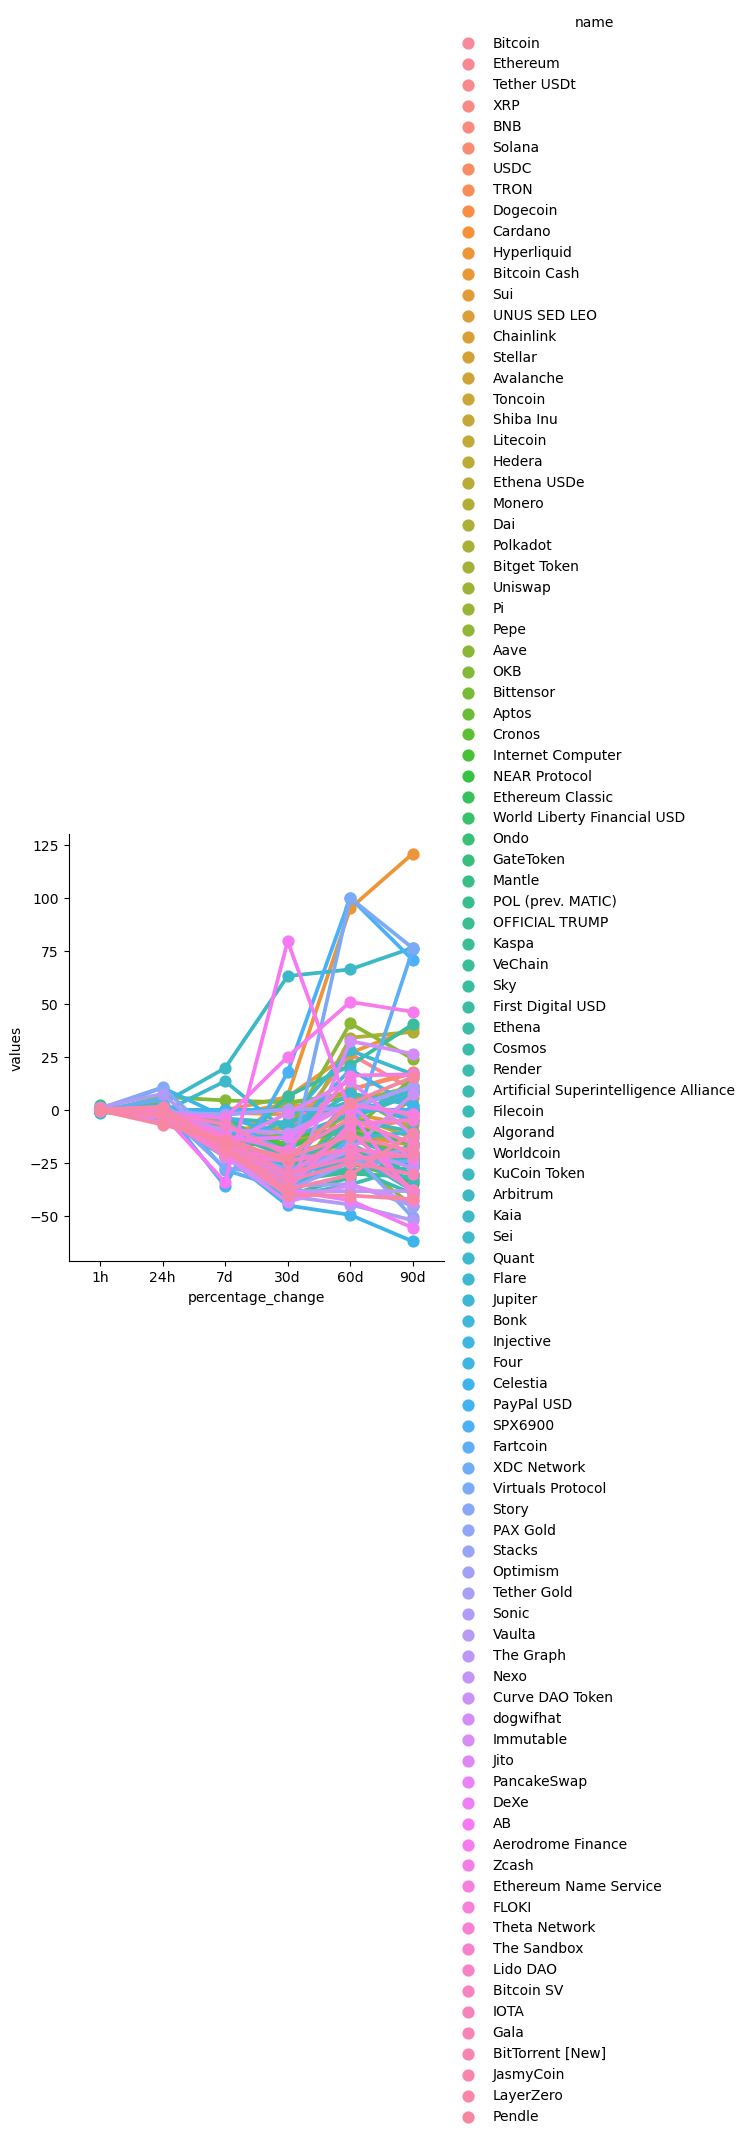

In [84]:
# Point Plot: The plot will show points for each combination of percentage change and values,
#connected by lines within each name category to show trends.
sns.catplot(x='percentage_change', y='values', hue='name', data=df3, kind='point')
# the 'hue' parameter is useful because we have multiple groups (name groups) and we want to compare trends over time

